In [1]:
import json
import spacy
import collections
import pandas as pd
import numpy as np
import seaborn as sns
from spacy.tokens import Span
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

## 基本情况

In [2]:
data_path = '/Users/ishi/PycharmProjects/NLP_Policy/NLP_Policy/data_process/datasets/entry.json'
with open(data_path, 'r') as f:
    raw_data = json.load(f)

In [3]:
raw_data = pd.DataFrame(raw_data)

In [4]:
raw_data

,sid,sentence,entry_list
0,410_6,第二条 科技保险补贴的对象为在嘉兴市范围内工商注册，拥有自主知识产权，具有较强的创新性和较高...,"[[6_1, 注册地, 注册地, 是, 嘉兴市, 注册, 嘉兴市, [23, 24], [1..."
1,410_8,一、高新技术企业；,"[[8_1, 业务领域, 支持对象类型, 是, 高新技术企业, , 高新技术企业, [-1,..."
2,410_9,二、省科技型中小企业；,"[[9_1, 业务领域, 支持对象类型, 是, 科技型, , 省科技型中小企业, [-1, ..."
3,410_10,三、省农业科技企业；,"[[10_1, 业务领域, 支持对象类型, 是, 农业科技, , 省农业科技企业, [-1,..."
4,410_11,四、国家知识产权示范企业、优势企业，省、市专利示范企业。,"[[11_1, 其他类别, 荣誉, 是, 国家知识产权示范企业, , 国家知识产权示范企业,..."
...,...,...,...
142,508_196,对区内航运企业按照其营业收入5%以内给予补助。,"[[196_1, 业务领域, 业务领域, 是, 航运, , 航运, [-1, -1], [3..."
143,508_205,对陆运企业营业收入1000万元以上、年实缴税收50万元以上、亩均税收10万元以上的，按照其营...,"[[205_1, 经营要求, 营业收入, 大于, 1000万元, 营业收入, 1000万元,..."
144,540_47,对被县、市、省、国家新认定的创业孵化示范基地(创业园)一次性给予30万元、50万元、100万...,"[[47_1, 经营要求, 荣誉, 是, 被县新认定的创业孵化示范基地(创业园), , 被县..."
145,540_59,对县级创业大赛的获奖项目，给予一等奖2万元、二等奖1万元、三等奖5000元、优胜奖2000元...,"[[59_1, 经营要求, 荣誉, 是, 县级创业大赛一等奖, , 县级创业大赛的获奖项目，..."


In [5]:
for i in range(raw_data.shape[0]):
    print(raw_data.loc[i, 'entry_list'])

[['6_1', '注册地', '注册地', '是', '嘉兴市', '注册', '嘉兴市', [23, 24], [15, 17]], ['6_2', '经营要求', '风险', '否', '重大违法行为', '', '在近三年内无重大违法行为的科技企业', [-1, -1], [52, 68]]]
[['8_1', '业务领域', '支持对象类型', '是', '高新技术企业', '', '高新技术企业', [-1, -1], [2, 7]]]
[['9_1', '业务领域', '支持对象类型', '是', '科技型', '', '省科技型中小企业', [-1, -1], [2, 9]], ['9_2', '企业类型', '企业类型', '是', '中小企业', '', '省科技型中小企业', [-1, -1], [2, 9]]]
[['10_1', '业务领域', '支持对象类型', '是', '农业科技', '', '省农业科技企业', [-1, -1], [2, 8]]]
[['11_1', '其他类别', '荣誉', '是', '国家知识产权示范企业', '', '国家知识产权示范企业', [-1, -1], [2, 11]], ['11_2', '其他类别', '荣誉', '是', '优势企业', '', '优势企业', [-1, -1], [13, 16]], ['11_3', '其他类别', '荣誉', '是', '省、市专利示范企业', '', '省、市专利示范企业', [-1, -1], [18, 26]]]
[['5_1', '业务领域', '业务领域', '是', '银行', '考核奖励对象', '银行', [2, 7], [10, 11]], ['5_2', '业务领域', '业务领域', '是', '保险机构', '考核奖励对象', '保险机构', [2, 7], [13, 16]], ['5_3', '业务领域', '业务领域', '是', '证券期货机构', '考核奖励对象', '证券期货机构', [2, 7], [18, 23]], ['5_4', '注册地', '注册地', '是', '柯桥区内', '', '区内', [-1, -1], [8, 9]]]
[['18_1', '经营要求', '当年实缴税费', '大于等于', 

## 准入条件分布

In [6]:
# var和field都在原文存在的句子数目
entry_count = []
for i in range(raw_data.shape[0]):
    for entry in raw_data.loc[i, 'entry_list']:
        if entry[-1] != [-1, -1] and entry[-2] != [-1, -1]:
            entry_count.append(entry)
print(len(entry_count))

86


In [7]:
# var在原文存在的句子数目
entry_count = []
for i in range(raw_data.shape[0]):
    for entry in raw_data.loc[i, 'entry_list']:
        if entry[-2] != [-1, -1]:
            entry_count.append(entry)
print(len(entry_count))

86


In [8]:
# field在原文存在的句子数目
entry_count = []
for i in range(raw_data.shape[0]):
    for entry in raw_data.loc[i, 'entry_list']:
        if entry[-1] != [-1, -1]:
            entry_count.append(entry)
print(len(entry_count))

325


In [9]:
# 准入条件类别分布
entry_dict = collections.defaultdict(int)
for i in range(raw_data.shape[0]):
    for entry in raw_data.loc[i, 'entry_list']:
        entry_dict[entry[1]] += 1
print(entry_dict)

defaultdict(<class 'int'>, {'注册地': 8, '经营要求': 233, '业务领域': 53, '企业类型': 17, '其他类别': 4, '法人资格': 5, '研发要求': 4, '产权要求': 1})


In [10]:
# 准入条件关系分布
entry_dict = collections.defaultdict(int)
for i in range(raw_data.shape[0]):
    for entry in raw_data.loc[i, 'entry_list']:
        entry_dict[entry[3]] += 1
print(entry_dict)

defaultdict(<class 'int'>, {'是': 226, '否': 6, '大于等于': 15, '大于': 54, '小于': 6, '符合': 16, '小于等于': 2})


In [11]:
# 准入条件变量分布
entry_dict = collections.defaultdict(int)
for i in range(raw_data.shape[0]):
    for entry in raw_data.loc[i, 'entry_list']:
        entry_dict[entry[2]] += 1
print(entry_dict)

defaultdict(<class 'int'>, {'注册地': 8, '风险': 6, '支持对象类型': 3, '企业类型': 19, '荣誉': 144, '业务领域': 48, '当年实缴税费': 1, '销售范围': 2, '销售收入': 3, '实到注册资本': 10, '法人资格': 5, '财政贡献': 1, '年建筑业产值': 4, '年实缴税收': 5, '标准': 9, '运行时间': 1, '纳税地': 1, '股本总额': 2, '经费': 4, '年销售收入': 6, '主营业务收入': 6, '年度内实际收入': 1, '主营业务年销售额': 3, '年新增税收总额': 2, '年业务额': 3, '不分割（自持）产权比例': 1, '年应纳税所得额': 2, '年度离岸外包业务实绩': 1, '运营时间': 1, '投资额': 1, '投资时间': 1, '固定资产投资': 1, '纯设备投资': 1, '年度工程和信息服务主营收入': 1, '设备投资': 1, '年度研发投入': 1, '装备产品': 2, '软件投入': 1, '软件业务收入': 5, '年产值': 1, '年科技服务营业收入': 1, '技术服务收入': 1, '实缴税收': 3, '营业收入': 1, '亩均税收': 1})


## 句子长度分布

max: 170
min: 9


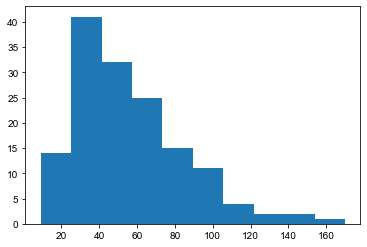

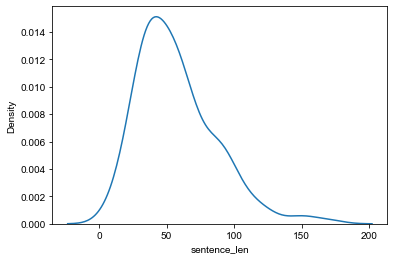

In [12]:
raw_data['sentence_len'] = raw_data['sentence'].apply(len)
print('max:', max(raw_data['sentence_len']))
print('min:', min(raw_data['sentence_len']))
plt.hist(raw_data['sentence_len'])
plt.show()
sns.kdeplot(raw_data['sentence_len'])
plt.show()